# Laptop Price Prediciton

**Author:** Rogerio Chaves

Description:</br>

## Preprocessing

### Import libraries

In [1]:
from IPython.display import display
from matplotlib.style import use
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import re

use('seaborn-v0_8')
%matplotlib inline

### Load the dataset.

In [2]:
df = pd.read_csv('data/laptop_price.csv', encoding='cp437')
display(df.head())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Change the column names to lower case form

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [6]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['company',
 'product',
 'typename',
 'screenresolution',
 'cpu',
 'ram',
 'memory',
 'gpu',
 'opsys',
 'weight']

In [7]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
display(df.head())

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_2.3ghz,8gb,128gb_ssd,intel_iris_plus_graphics_640,macos,1.37kg,1339.69
1,2,apple,macbook_air,ultrabook,13.3,1440x900,intel_core_i5_1.8ghz,8gb,128gb_flash_storage,intel_hd_graphics_6000,macos,1.34kg,898.94
2,3,hp,250_g6,notebook,15.6,full_hd_1920x1080,intel_core_i5_7200u_2.5ghz,8gb,256gb_ssd,intel_hd_graphics_620,no_os,1.86kg,575.00
3,4,apple,macbook_pro,ultrabook,15.4,ips_panel_retina_display_2880x1800,intel_core_i7_2.7ghz,16gb,512gb_ssd,amd_radeon_pro_455,macos,1.83kg,2537.45
4,5,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_3.1ghz,8gb,256gb_ssd,intel_iris_plus_graphics_650,macos,1.37kg,1803.60


### Setting up the validation framework

Let's split the dataset in:

* 80% for training (cross validation);

* 20% for test.

In [9]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

print(f'Training dataframe shape: {df_train.shape}')
print(f'Testing dataframe shape: {df_test.shape}')

Training dataframe shape: (1042, 13)
Testing dataframe shape: (261, 13)


### Drop unnecessary columns

`laptop_id`

In [10]:
del df_train['laptop_id']
display(df_train)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
951,dell,latitude_7480,ultrabook,14.0,full_hd_1920x1080,intel_core_i7_7600u_2.8ghz,8gb,256gb_ssd,intel_hd_graphics_620,windows_10,1.36kg,1775.00
741,dell,vostro_3568,notebook,15.6,1366x768,intel_core_i3_6006u_2ghz,8gb,256gb_ssd,intel_hd_graphics_520,windows_10,2kg,665.00
1148,hp,elitebook_850,notebook,15.6,full_hd_1920x1080,intel_core_i5_6200u_2.3ghz,8gb,256gb_ssd,intel_hd_graphics_520,windows_7,1.88kg,1579.00
491,toshiba,portege_x30-d-10l,ultrabook,13.3,full_hd_/_touchscreen_1920x1080,intel_core_i7_7500u_2.7ghz,32gb,512gb_ssd,intel_hd_graphics_620,windows_10,1.05kg,2799.00
495,lenovo,thinkpad_x260,ultrabook,12.5,ips_panel_1366x768,intel_core_i5_6200u_2.3ghz,8gb,180gb_ssd,intel_hd_graphics_520,windows_10,1.3kg,1099.00
...,...,...,...,...,...,...,...,...,...,...,...,...
715,lenovo,thinkpad_e470,notebook,14.0,ips_panel_full_hd_1920x1080,intel_core_i5_7200u_2.5ghz,8gb,256gb_ssd,nvidia_geforce_920mx,windows_10,1.87kg,857.07
905,lg,gram_15z970,ultrabook,15.6,ips_panel_full_hd_/_touchscreen_1920x1080,intel_core_i7_7500u_2.7ghz,16gb,512gb_ssd,intel_hd_graphics_620,windows_10,1.08kg,2099.00
1096,dell,inspiron_5567,notebook,15.6,full_hd_1920x1080,intel_core_i5_7200u_2.5ghz,8gb,1tb_hdd,amd_radeon_r7_m445,windows_10,2.36kg,638.80
235,dell,inspiron_5567,notebook,15.6,full_hd_1920x1080,intel_core_i7_7500u_2.7ghz,16gb,256gb_ssd,amd_radeon_r7_m445,linux,2.36kg,899.00


### Missing values.

In [11]:
df.isnull().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

### Remove duplicates

In [12]:
print(f'Number of laptops: {len(df_train)}')
df_train.drop_duplicates(inplace=True)
print(f'Number of laptops without duplicates: {len(df_train)}')

Number of laptops: 1042
Number of laptops without duplicates: 1021


### Change "ram" and "weight" to numerical column

In [13]:
def to_numeric(value):
    number = re.search(r'[0-9]+([.][0-9]+)?', value).group()
    try:
        if '.' in number:
            number = float(number)
            return number
        else:
            number = int(number)
            return number
    except ValueError:
        print('Isn\'t a number!')

In [14]:
df_train.ram = df_train.ram.apply(to_numeric)
df_train.weight = df_train.weight.apply(to_numeric)
display(df_train.head())

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
951,dell,latitude_7480,ultrabook,14.0,full_hd_1920x1080,intel_core_i7_7600u_2.8ghz,8,256gb_ssd,intel_hd_graphics_620,windows_10,1.36,1775.0
741,dell,vostro_3568,notebook,15.6,1366x768,intel_core_i3_6006u_2ghz,8,256gb_ssd,intel_hd_graphics_520,windows_10,2.00,665.0
1148,hp,elitebook_850,notebook,15.6,full_hd_1920x1080,intel_core_i5_6200u_2.3ghz,8,256gb_ssd,intel_hd_graphics_520,windows_7,1.88,1579.0
491,toshiba,portege_x30-d-10l,ultrabook,13.3,full_hd_/_touchscreen_1920x1080,intel_core_i7_7500u_2.7ghz,32,512gb_ssd,intel_hd_graphics_620,windows_10,1.05,2799.0
495,lenovo,thinkpad_x260,ultrabook,12.5,ips_panel_1366x768,intel_core_i5_6200u_2.3ghz,8,180gb_ssd,intel_hd_graphics_520,windows_10,1.30,1099.0


## Exploratoty data analysis

- Look at the target variable
- Split categorical and numerical features
- Feature importance: mutual information
- Feature importance: correlation
- Select the relevant columns

### Distribuition of price.

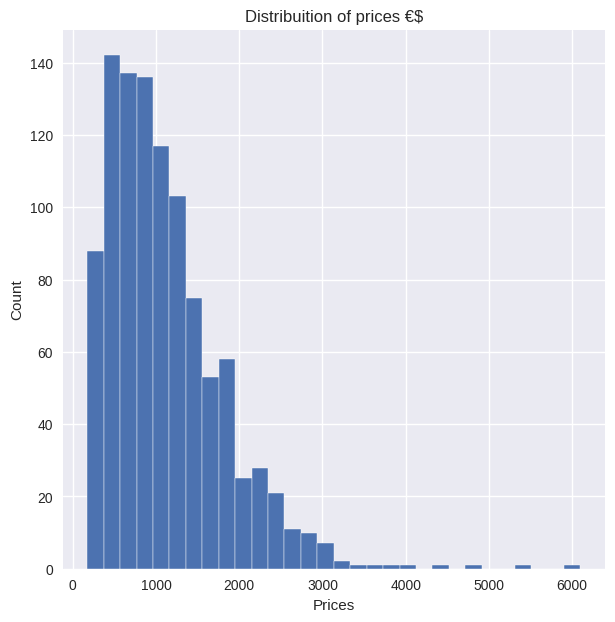

In [15]:
plt.figure(figsize=(7, 7))
plt.hist(df_train.price_euros, bins=30, edgecolor='white')
plt.title('Distribuition of prices €$')
plt.xlabel('Prices')
plt.ylabel('Count')
plt.show()

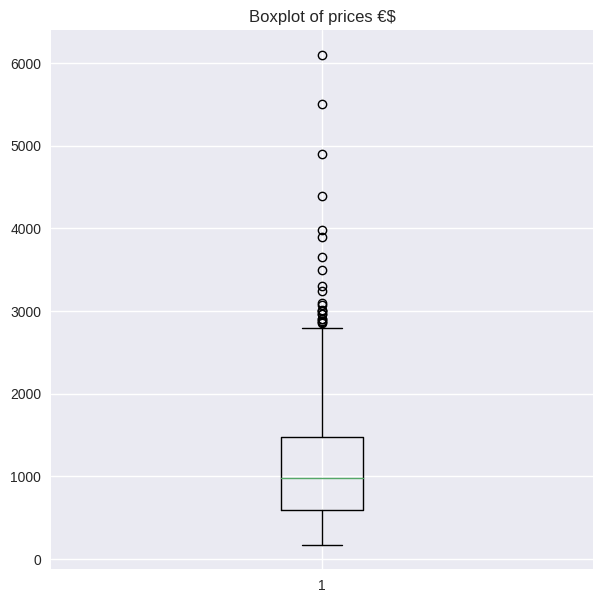

In [16]:
plt.figure(figsize=(7, 7))
plt.boxplot(df_train.price_euros)
plt.title('Boxplot of prices €$')
plt.show()

In [17]:
df_train.price_euros.describe()

count    1021.000000
mean     1122.074212
std       699.353437
min       174.000000
25%       599.000000
50%       979.000000
75%      1479.000000
max      6099.000000
Name: price_euros, dtype: float64

### Distribution of Companies.

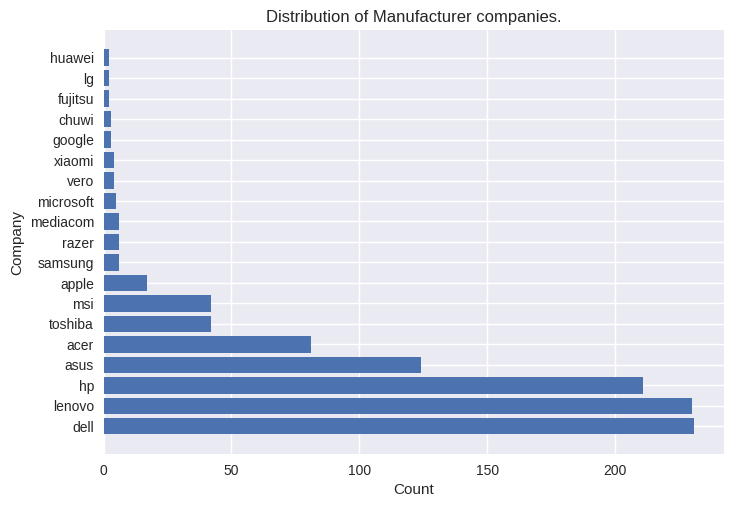

In [18]:
company = df_train.company.value_counts()
plt.barh(company.index, company.values)
plt.title('Distribution of Manufacturer companies.')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

In [19]:
share = company[['dell', 'lenovo', 'hp']].sum() / company.sum()
print(f'Share of the tree most companies: {share*100:.2f}%')

Share of the tree most companies: 65.82%


### Distribution of Product.

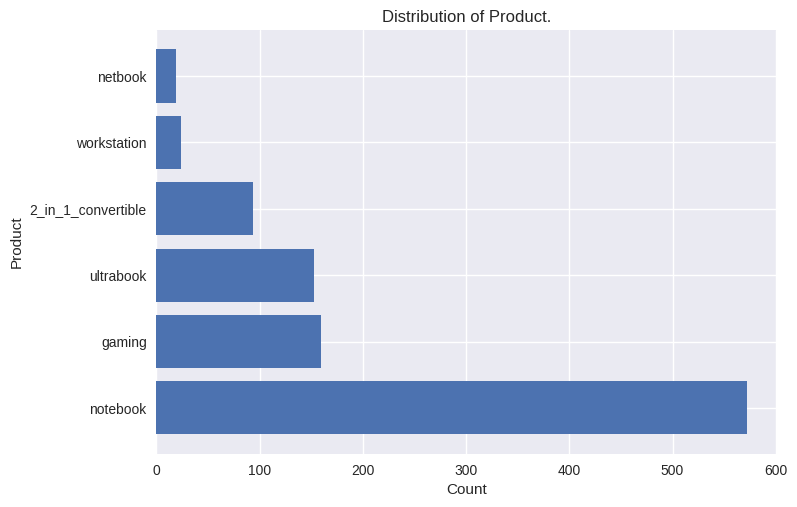

In [20]:
typename = df_train.typename.value_counts()
plt.barh(typename.index, typename.values)
plt.title('Distribution of Product.')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

### Distribuition of Inches.

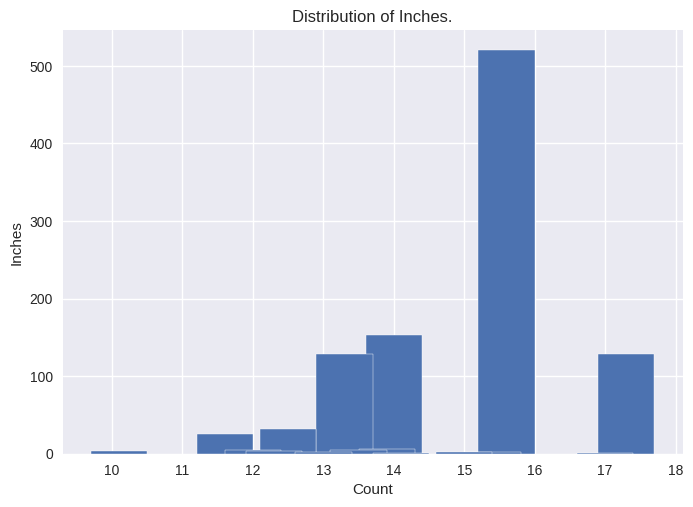

In [21]:
inches = df_train.inches.value_counts()
plt.bar(inches.index, inches.values, edgecolor='white')
plt.title('Distribution of Inches.')
plt.xlabel('Count')
plt.ylabel('Inches')
plt.show()

In [22]:
inches.iloc[:5]

15.6    520
14.0    153
13.3    129
17.3    129
12.5     32
Name: inches, dtype: int64

### Distribuition of CPU.

In [23]:
cpu = df_train.cpu.value_counts()[:5]
cpu

intel_core_i5_7200u_2.5ghz     148
intel_core_i7_7700hq_2.8ghz    112
intel_core_i7_7500u_2.7ghz     107
intel_core_i7_8550u_1.8ghz      61
intel_core_i5_6200u_2.3ghz      57
Name: cpu, dtype: int64

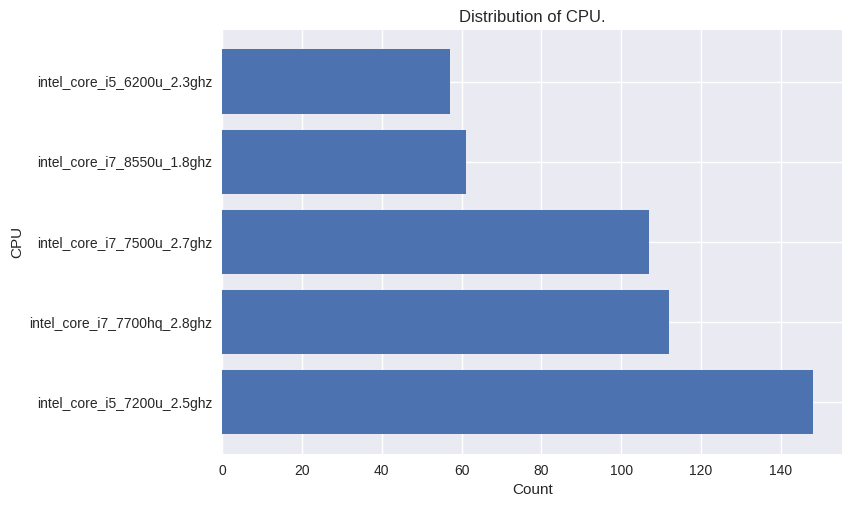

In [24]:
plt.barh(cpu.index, cpu.values)
plt.title('Distribution of CPU.')
plt.xlabel('Count')
plt.ylabel('CPU')
plt.show()

### Distribution of Memory RAM.

In [25]:
ram = df_train.ram.value_counts()
ram

8     494
4     295
16    155
6      28
12     17
2      16
32     12
24      3
64      1
Name: ram, dtype: int64

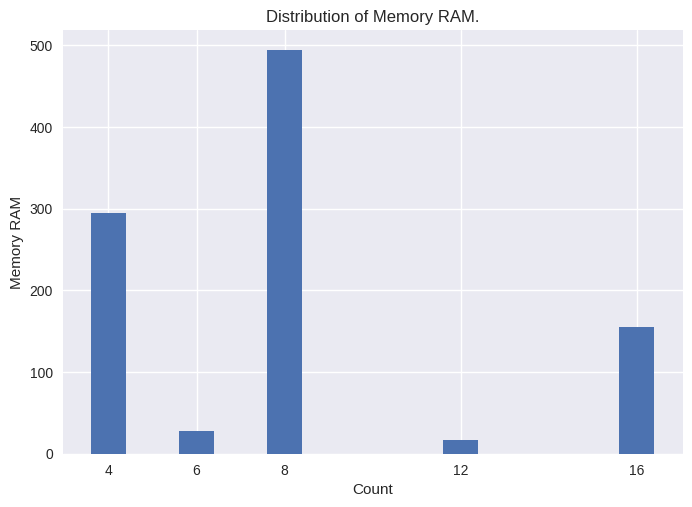

In [26]:
plt.bar(ram[:5].index, ram[:5].values)
plt.title('Distribution of Memory RAM.')
plt.xlabel('Count')
plt.ylabel('Memory RAM')
plt.xticks(ram[:5].index)
plt.show()

### Distribution of GPU.

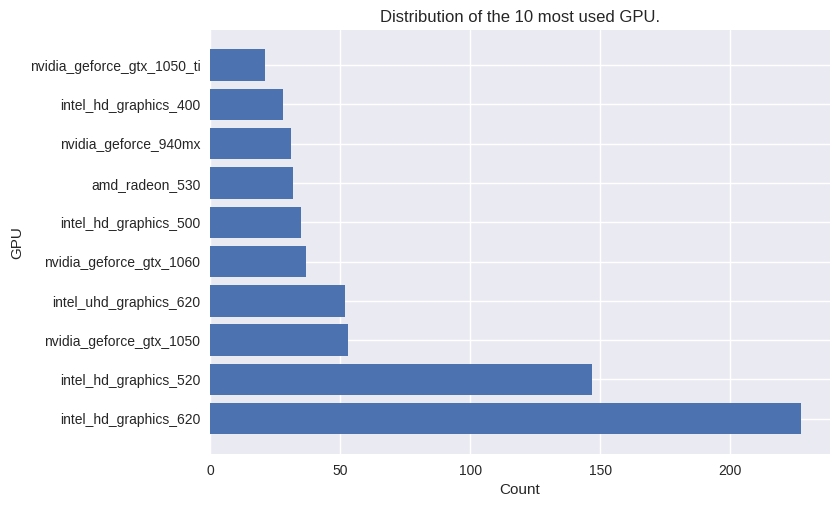

In [27]:
gpu = df_train.gpu.value_counts()[:10]
plt.barh(gpu.index, gpu.values)
plt.title('Distribution of the 10 most used GPU.')
plt.xlabel('Count')
plt.ylabel('GPU')
plt.show()

### Distribution of Operationg System - OS.

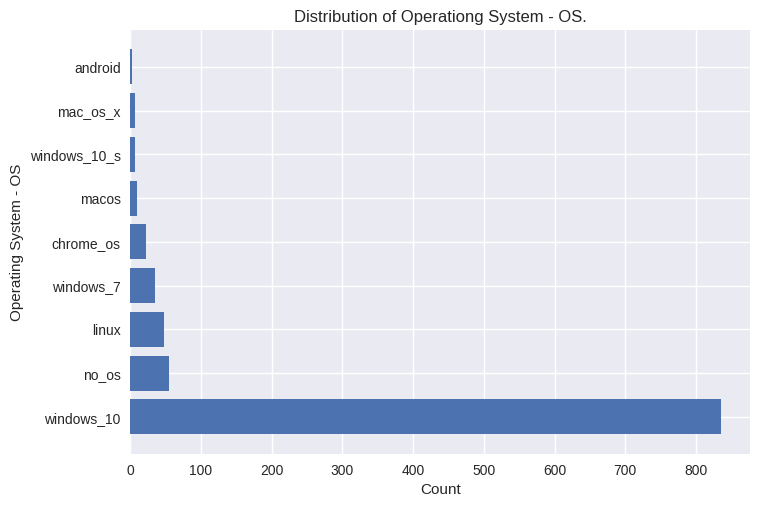

In [28]:
os = df_train.opsys.value_counts()
plt.barh(os.index, os.values)
plt.title('Distribution of Operationg System - OS.')
plt.xlabel('Count')
plt.ylabel('Operating System - OS')
plt.show()

In [29]:
os_share = os['windows_10'] / os.sum()
print(f'Share of Windows 10 operating system: {os_share*100:.2f}%')

Share of Windows 10 operating system: 81.78%


### Distribution of Weight

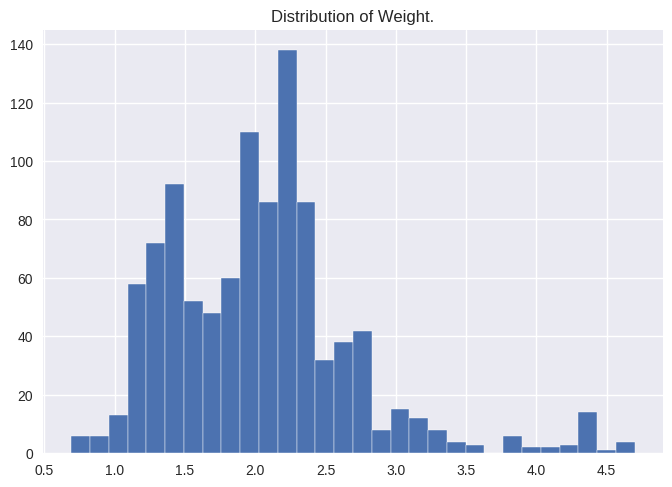

In [30]:
plt.hist(df_train.weight, bins=30, edgecolor='white')
plt.title('Distribution of Weight.')
plt.show()

### Split categorical and numerical features

In [31]:
columns_cols = set(df_train.columns)
num_cols = set(df_train.dtypes[df_train.dtypes != 'object'].index)
cat_cols = columns_cols - num_cols

In [32]:
cat_cols = list(cat_cols)
cat_cols

['gpu',
 'screenresolution',
 'cpu',
 'typename',
 'product',
 'opsys',
 'company',
 'memory']

In [33]:
num_cols = list(num_cols)
num_cols.remove('price_euros')
num_cols

['weight', 'ram', 'inches']

In [34]:
print(f'Categorical columns: {len(cat_cols)}\n'
     f'Numerical columns: {len(num_cols)}')

Categorical columns: 8
Numerical columns: 3


### Label encoding

In [35]:
gpu_encoder = LabelEncoder()
typename_encoder = LabelEncoder()
cpu_encoder = LabelEncoder()
memory_encoder = LabelEncoder()
resolution_encoder = LabelEncoder()
company_encoder = LabelEncoder()
product_encoder = LabelEncoder()
opsys_encoder = LabelEncoder()

In [36]:
df_train['gpu'] = gpu_encoder.fit_transform(df_train['gpu'])
df_train['typename'] = typename_encoder.fit_transform(df_train['typename'])
df_train['cpu'] = cpu_encoder.fit_transform(df_train['cpu'])
df_train['memory'] = memory_encoder.fit_transform(df_train['memory'])
df_train['screenresolution'] = resolution_encoder.fit_transform(df_train['screenresolution'])
df_train['company'] = company_encoder.fit_transform(df_train['company'])
df_train['product'] = product_encoder.fit_transform(df_train['product'])
df_train['opsys'] = opsys_encoder.fit_transform(df_train['opsys'])

In [37]:
df_train.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
951,4,230,4,14.0,8,77,8,16,44,6,1.36,1775.0
741,4,431,3,15.6,0,39,8,16,38,6,2.00,665.0
1148,7,94,3,15.6,8,49,8,16,38,8,1.88,1579.0
491,16,269,4,13.3,7,75,32,29,44,6,1.05,2799.0
495,9,382,4,12.5,9,49,8,9,38,6,1.30,1099.0


### Feature importance: mutual information

In [38]:
mutual_info_r = mutual_info_regression(df_train[cat_cols], df_train.price_euros)
mutual_info_r

array([0.55411541, 0.25089731, 0.6902472 , 0.31770127, 0.47011417,
       0.10407815, 0.13381284, 0.43509593])

In [56]:
mutual_info_df = pd.DataFrame(cat_cols)
mutual_info_df['mi'] = mutual_info_r
mutual_info_df = mutual_info_df.set_index(0)
mutual_info_df.sort_values(by='mi', ascending=False, inplace=True)
mutual_info_df

,mi
0,
cpu,0.690247
gpu,0.554115
product,0.470114
memory,0.435096
typename,0.317701
screenresolution,0.250897
company,0.133813
opsys,0.104078


### Feature importance: correlation

In [63]:
corr = df_train[num_cols].corrwith(df_train.price_euros)
corr = pd.DataFrame(corr)
corr.sort_values(by=0, ascending=False, inplace=True)
corr

,0
ram,0.736197
weight,0.186709
inches,0.049140


In [61]:
pd.DataFrame(corr)

,0
weight,0.186709
ram,0.736197
inches,0.049140


### Select the relevant columns

In [ ]:
relevant_columns = list(df_train.columns)
relevant_columns

In [28]:
df_train = df_train[relevant_columns]

In [ ]:
df_train.head()

### Split features and target.

In [68]:
y_train = df_train.price_euros.values

In [69]:
del df_train['price_euros']

In [70]:
X_train = df_train.values

In [ ]:
X_train.shape, y_train.shape

## Model Selection.

### Decision Tree model

In [76]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
dt_model = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters)
dt_model.fit(X_train, y_train)

`Best score`

In [ ]:
dt_model.best_score_

`Best parameters`

In [ ]:
dt_model.best_params_

### Random Forest model

In [41]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 40, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}

In [ ]:
rf_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
rf_model.fit(df_train.values, y_train)

`Best score`

In [ ]:
rf_model.best_score_

`Best parameters`

In [ ]:
rf_model.best_params_

## Save files

In [ ]:
model_dir = 'model'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print('Directory was created!')

### Save relevant columns list.

In [ ]:
with open(f'{model_dir}/relevant_columns.bin', 'wb') as f:
    pickle.dump((relevant_columns), f)
    f.close()